# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

36764


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'higher_order_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load distance matrices and contact matrices

In [11]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [12]:
class_2_contact_filename = os.path.join(input_folder, 'subclass_2_contactDict_750.pkl')

class_2_contactDict = pickle.load(open(class_2_contact_filename, 'rb'))
print(class_2_contactDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


# Summarize insulation across all chromosomes

In [13]:
from ImageAnalysis3.structure_tools import distance
#codebook_df = df_refgen.copy(deep=True)
sel_codebook = codebook_df

sort_by_region=False
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, codebook_df, sort_by_region=False)## load codebook

In [14]:
from matplotlib.colors import LogNorm
import ImageAnalysis3.structure_tools.distance as distance

#from ImageAnalysis3.domain_tools.distance import _sliding_window_dist
import insulation
reload(insulation)

from insulation import sliding_window_insulation, sliding_window_insulation_by_gene_dist
from scipy.signal import find_peaks

In [15]:
all_chroms = np.array([c for c in np.unique(codebook_df['chr']) if c!= 'Y'])
all_chroms 

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '3', '4', '5', '6', '7', '8', '9', 'X'], dtype='<U2')

## process

In [16]:
ins_res_dict = {'celltype':[], 'insulation_iqr':[], 'peak_number':[], 'chr':[], 'window_size':[]}
wd_size_list = [16]

import tqdm

for _class in tqdm.tqdm(class_2_contactDict.keys()):
    print (f'Analyze {_class}')
    # get contact maps
    summary_dict = class_2_contactDict[_class]
    _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
            summary_dict, codebook_df, 
            sel_codebook=codebook_df, 
            use_cis=True, sort_by_region=sort_by_region,
                                                        )

    for chosen_chrom in all_chroms:
        # slice contact maps for chromosome
        _chr_indices = chr_2_indices[chosen_chrom]
        cis_mat_chr = _cis_mat[:,_chr_indices]
        cis_mat_chr = cis_mat_chr[_chr_indices,:]
        # estimate insulation and peaks ('large megabase domains')
        
        for wd_size in wd_size_list:
            distance_wd_dists = sliding_window_insulation(cis_mat_chr, _wd=wd_size, 
                                                     _dist_metric='normed_insulation')

            distance_peaks = find_peaks(-distance_wd_dists, distance=5, 
                                    prominence=0.05, width=1)

            ins_IQR = np.nanpercentile(distance_wd_dists,75)-np.nanpercentile(distance_wd_dists,25)
            peak_num = len(distance_peaks[0])

            # append result
            ins_res_dict['celltype'].append(_class)
            ins_res_dict['insulation_iqr'].append(ins_IQR)
            ins_res_dict['peak_number'].append(peak_num)
            ins_res_dict['chr'].append(chosen_chrom)
            ins_res_dict['window_size'].append(wd_size)


  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Analyze Oligo


  5%|███▉                                                                               | 1/21 [00:01<00:33,  1.65s/it]

Analyze L5 IT


 10%|███████▉                                                                           | 2/21 [00:03<00:31,  1.66s/it]

Analyze Micro


 14%|███████████▊                                                                       | 3/21 [00:04<00:29,  1.66s/it]

Analyze Peri


 19%|███████████████▊                                                                   | 4/21 [00:06<00:28,  1.66s/it]

Analyze Endo


 24%|███████████████████▊                                                               | 5/21 [00:08<00:26,  1.66s/it]

Analyze Astro


 29%|███████████████████████▋                                                           | 6/21 [00:09<00:24,  1.66s/it]

Analyze OPC


 33%|███████████████████████████▋                                                       | 7/21 [00:11<00:23,  1.66s/it]

Analyze L6 CT


 38%|███████████████████████████████▌                                                   | 8/21 [00:13<00:21,  1.66s/it]

Analyze L5 ET


 43%|███████████████████████████████████▌                                               | 9/21 [00:14<00:19,  1.66s/it]

Analyze L5/6 NP


 48%|███████████████████████████████████████                                           | 10/21 [00:16<00:18,  1.66s/it]

Analyze Pvalb


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:18<00:16,  1.66s/it]

Analyze L6 IT


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:19<00:14,  1.66s/it]

Analyze Lamp5


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:21<00:13,  1.66s/it]

Analyze L6b


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:23<00:11,  1.66s/it]

Analyze Sst


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:24<00:09,  1.66s/it]

Analyze SMC


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:26<00:08,  1.66s/it]

Analyze L4/5 IT


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:28<00:06,  1.66s/it]

Analyze L2/3 IT


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:29<00:04,  1.66s/it]

Analyze Vip


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:31<00:03,  1.66s/it]

Analyze Sncg


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:33<00:01,  1.66s/it]

Analyze VLMC


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:34<00:00,  1.66s/it]


In [17]:
ins_res_df = pd.DataFrame(ins_res_dict)
ins_res_df.head(10)

,celltype,insulation_iqr,peak_number,chr,window_size
0,Oligo,0.328812,11,1,16
1,Oligo,0.299610,7,10,16
2,Oligo,0.250850,8,11,16
3,Oligo,0.501359,3,12,16
4,Oligo,0.548560,3,13,16
5,Oligo,0.492465,5,14,16
6,Oligo,0.371513,3,15,16
7,Oligo,0.455067,5,16,16
8,Oligo,0.297055,3,17,16
9,Oligo,0.284833,4,18,16


## plot results

meta NOT subset; don't know how to subset; dropped


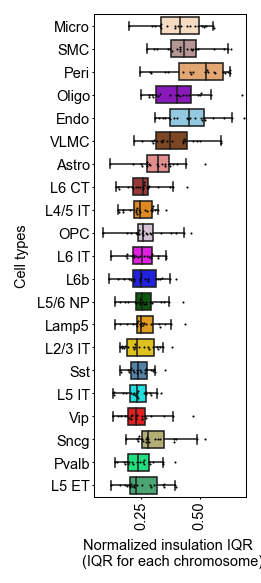

In [19]:
# order based on long-range distance medians
sorted_cellplot_order = ['Micro', 'SMC', 'Peri', 'Oligo', 'Endo', 'VLMC', 'Astro', 'L6 CT',
       'L4/5 IT', 'OPC', 'L6 IT', 'L6b', 'L5/6 NP', 'Lamp5', 'L2/3 IT', 'Sst',
       'L5 IT', 'Vip', 'Sncg', 'Pvalb', 'L5 ET']


fig, ax = plt.subplots(
                         figsize=(_page_width/4.2,_page_width/3.95*3), 
                         sharex=True, sharey=False, dpi=150)

for _idx, _window_size in enumerate(wd_size_list[:1]):
    plot_df = ins_res_df[ins_res_df['window_size']==_window_size]

    sns.boxplot(plot_df, x = 'insulation_iqr', y='celltype', order=sorted_cellplot_order, 
                width=0.75, 
                palette=celltype_palette,
                fliersize=0,
                whis=[0,95],
                linewidth=0.75,
                orient="h",
                ax= ax)
    sns.swarmplot(plot_df, x = 'insulation_iqr', y='celltype', order=sorted_cellplot_order,  
                  ax= ax, 
                  s= 1, 
                  legend=False, 
                  alpha=1,
                  color ='black',
                  orient="h",
                  #hue = 'chr',
                 )
    
    ax.tick_params(axis='y', pad=1, labelsize=_font_size) 
    if _idx==0:
        ax.set_ylabel('Cell types',fontsize=_font_size)
        ax.tick_params(axis='x', rotation=90, pad=1, labelsize=_font_size) 
    else:
        ax.set_xlabel('',fontsize=0)
        ax.set_ylabel('',fontsize=0)
        ax.tick_params(axis='x', rotation=0, labelsize=0,length=0) 

plt.xlim([0.05,0.7])
plt.xlabel('Normalized insulation IQR \n (IQR for each chromosome)',fontsize=_font_size,)
ax.grid(False)

ax.tick_params(axis='both', pad=1,labelsize=7, length=1, width=0.5) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'megadomain_insulation_summary.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight') 


plt.show()

## plot results version 2

meta NOT subset; don't know how to subset; dropped


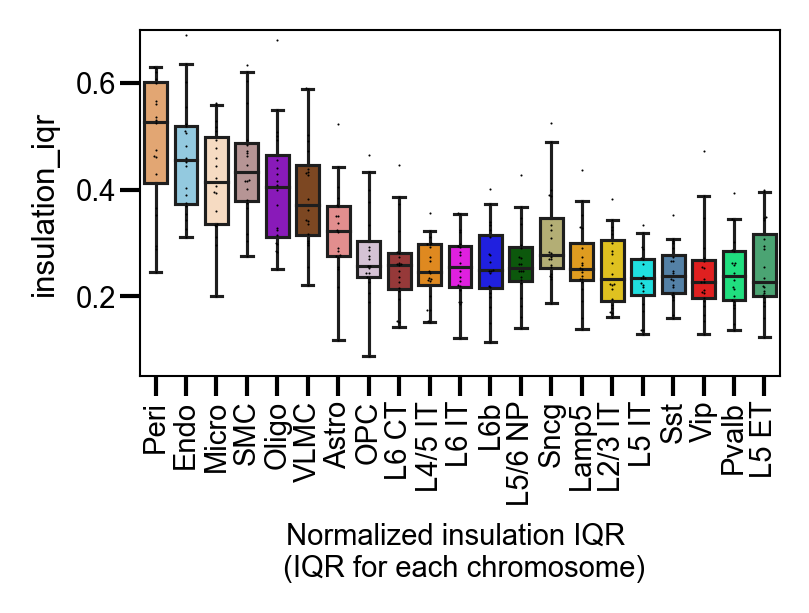

In [20]:
# order based on long-range distance medians
sorted_cellplot_order = ['Peri','Endo', 'Micro', 'SMC',  'Oligo','VLMC', 'Astro', 'OPC', 'L6 CT',
       'L4/5 IT', 'L6 IT', 'L6b', 'L5/6 NP', 'Sncg','Lamp5', 'L2/3 IT', 
       'L5 IT', 'Sst','Vip',  'Pvalb', 'L5 ET']


fig, ax = plt.subplots(
                         figsize=(2.75,1.5), 
                          dpi=300)


for _idx, _window_size in enumerate(wd_size_list[:1]):
    plot_df = ins_res_df[ins_res_df['window_size']==_window_size]

    sns.boxplot(plot_df, y = 'insulation_iqr', x='celltype', order=sorted_cellplot_order, 
                width=0.75, 
                palette=celltype_palette,
                fliersize=0,
                whis=[0,95],
                linewidth=0.75,
                #orient="h",
                ax= ax)
    sns.swarmplot(plot_df, y = 'insulation_iqr', x='celltype', order=sorted_cellplot_order,  
                  ax= ax, 
                  s= 0.5, 
                  legend=False, 
                  #linewidth=1,
                  alpha=1,
                  color ='black',
                  #orient="h",
                  #hue = 'chr',
                 )
    
    ax.tick_params(axis='y', pad=1, labelsize=_font_size) 
    if _idx==0:
        ax.set_xlabel('Cell types',fontsize=_font_size)
        ax.tick_params(axis='x', rotation=90, pad=1, labelsize=_font_size) 
    else:
        ax.set_xlabel('',fontsize=0)
        ax.set_ylabel('',fontsize=0)
        ax.tick_params(axis='x', rotation=0, labelsize=0,length=0) 

plt.ylim([0.05,0.7])
plt.xlabel('Normalized insulation IQR \n (IQR for each chromosome)',fontsize=_font_size,)
ax.grid(False)
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'megadomain_insulation_summary_v2.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight') 


plt.show()